AVCAD - Exercise 11

Students: Maria Dolgaya (28168) and Mariana Coelho (25605)

Using the dataset in EFIplus_medit.zip:

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [26]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna()

In [27]:
df_dtmm = df[df['Catchment_name'].isin(['Douro', 'Tejo', 'Minho', 'Mondego'])]
df_dtmm

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,PTTA264,39.477852,-8.002427,Portugal,Tejo,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4948,PTTA265,39.477021,-8.106303,Portugal,Tejo,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4949,PTTA266,39.475082,-8.334351,Portugal,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4950,PTTA267,39.453694,-8.432669,Portugal,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
continuous_variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df_continuous = df_dtmm[continuous_variables]
df_continuous

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
18,1179,0.001,1687.103217,810.092422,9.3,1.4,18.4
19,1038,2.258,1293.238318,650.030528,10.4,2.2,19.6
28,636,0.263,967.398405,513.949149,12.6,3.8,21.3
32,890,2.909,1088.329483,553.756064,11.2,2.7,20.5
43,872,3.530,985.273741,518.863081,11.1,2.6,20.0
...,...,...,...,...,...,...,...
4947,38,0.100,704.675069,515.039678,17.1,10.3,23.8
4948,26,0.100,702.673201,516.097287,17.1,10.4,23.6
4949,20,0.100,697.730192,518.386401,16.7,10.8,22.9
4950,13,0.100,679.784324,556.028518,16.7,10.9,22.7


Data standardization

In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_continuous_scaled = StandardScaler().fit_transform(df_continuous)
df_scaled = pd.DataFrame(data=df_continuous_scaled, 
                         columns=df_continuous.columns)
df_scaled.head()


,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
0,2.317434,-0.792732,2.286957,-1.089865,-1.749363,-1.868883,-0.917168
1,1.853915,-0.676045,1.253702,-1.815993,-1.236037,-1.548490,-0.331631
2,0.532391,-0.779186,0.398903,-2.433332,-0.209383,-0.907706,0.497880
3,1.367384,-0.642389,0.716150,-2.252746,-0.862708,-1.348245,0.107522
4,1.308211,-0.610283,0.445796,-2.411039,-0.909374,-1.388294,-0.136452


1. Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous
exercises), using the Douro and Tejo basins as the pre-determined groups. Produce a biplot with
‘Catchment_name’ as a grouping variable.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

Define predictor and response variables

In [31]:
X = df_scaled
y = df_dtmm['Catchment_name'] # 4 catchments

#Fit the LDA model (we set to two components)
model = LinearDiscriminantAnalysis(n_components=2)
LDA = model.fit_transform(X, y)

Extract the first discriminant axis to a DataFrame

In [32]:
LDA_scores = pd.DataFrame(data=LDA, 
                          columns=['LD1','LD2'])
LDA_scores.head(6)

,LD1,LD2
0,0.043208,1.024932
1,-0.625294,-0.420343
2,-0.629831,-1.698250
3,-0.563926,-1.386428
4,0.110545,-1.671937
5,-1.217251,-2.053460


Define method to evaluate model

In [33]:
#defines the kfold crossvalidation settings for the next function 'cross_val_score'
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

#evaluate model (classification accuracy - from 0 to 1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8869966209501093


Plot the fist discriminant plane

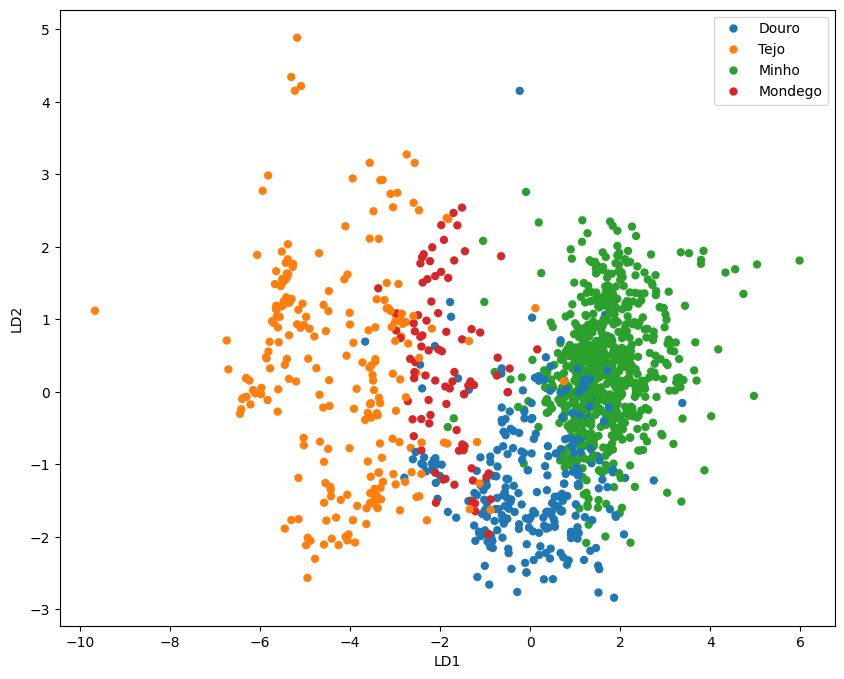

In [34]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=LDA_scores['LD1'],
              y=LDA_scores['LD2'],
              hue = df_dtmm['Catchment_name'].tolist(),
              linewidth=0,
              )
plt.show()

Biplot

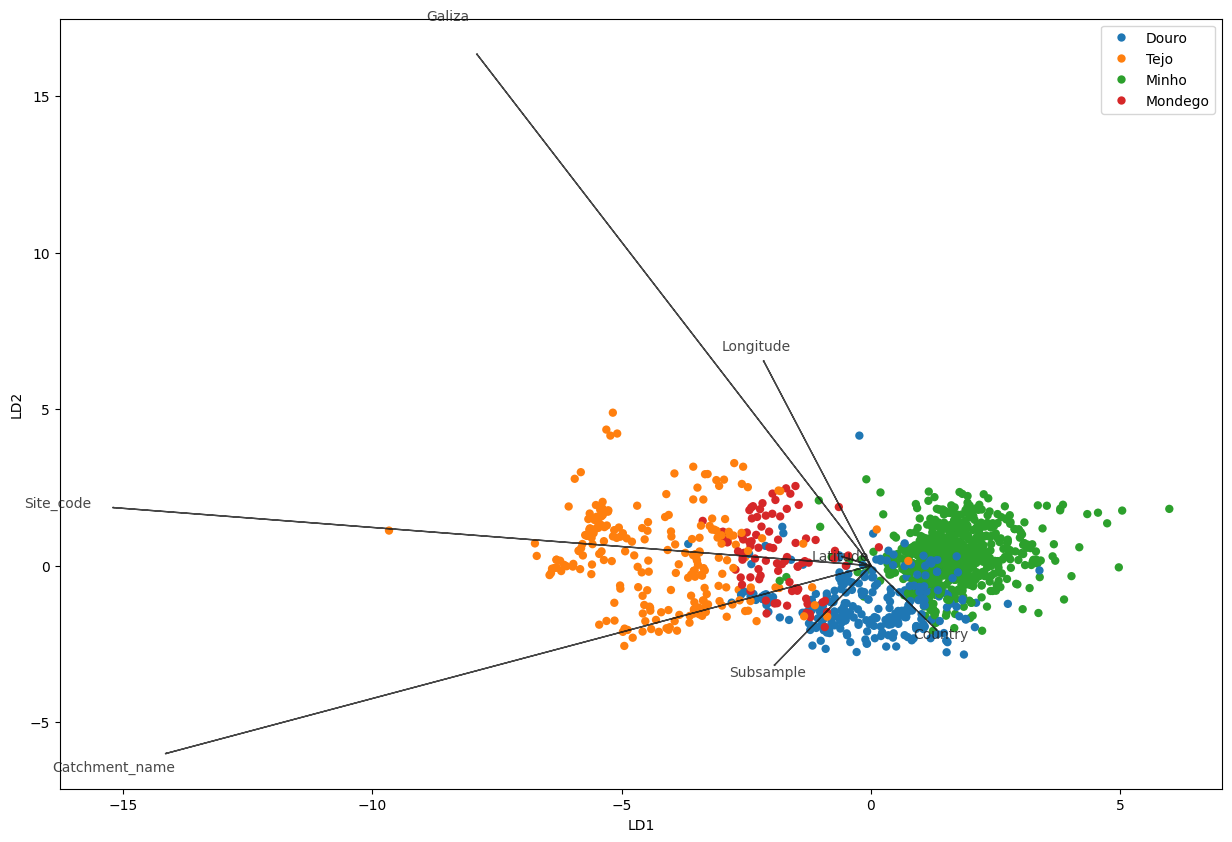

In [35]:
plt.figure(figsize=(15, 10))

sns.scatterplot(x=LDA_scores['LD1'],
              y=LDA_scores['LD2'],
              hue = df_dtmm['Catchment_name'].tolist(),
              linewidth=0,
              )

n = model.n_features_in_
for i in range(len(model.scalings_)):
        plt.arrow(0, 0, model.scalings_[i,0]*4, # Scalings were multiplied by a factor of 4 to just to facilitate the visualization
                  model.scalings_[i,1]*4, # Scalings were multiplied by a factor of 4 to just to facilitate the visualization
                  color = (0.1, 0.1, 0.1, 0.8),
                  head_width=0.02) # plot arrows for each variable
        plt.text(model.scalings_[i,0]* 4.3, # plot the names of the variables
                 model.scalings_[i,1] * 4.3,
                 list(df_dtmm.columns)[i], 
                 color = (0.1, 0.1, 0.1, 0.8), 
                 ha = 'center', 
                 va = 'center') # variable labels for each arrow

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

2. Try to build interactive plots that display data in the space defined by the Discriminant Functions.

We will be using Bokeh for this exercise.

In [36]:
from bokeh.io import curdoc, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider
from bokeh.palettes import Spectral6
from bokeh.layouts import column, row

In [37]:
# load BokehJS - enables the plot to be displayed within the notebook
output_notebook()

Loading BokehJS ...

In [38]:
LDA_scores

,LD1,LD2
0,0.043208,1.024932
1,-0.625294,-0.420343
2,-0.629831,-1.698250
3,-0.563926,-1.386428
4,0.110545,-1.671937
...,...,...
1287,-5.938743,2.774090
1288,-5.816711,2.985430
1289,-5.224014,4.153472
1290,-5.087455,4.219369


In [39]:
LDA_scores['Catchment_name'] = y.values
LDA_scores

,LD1,LD2,Catchment_name
0,0.043208,1.024932,Douro
1,-0.625294,-0.420343,Douro
2,-0.629831,-1.698250,Douro
3,-0.563926,-1.386428,Douro
4,0.110545,-1.671937,Douro
...,...,...,...
1287,-5.938743,2.774090,Tejo
1288,-5.816711,2.985430,Tejo
1289,-5.224014,4.153472,Tejo
1290,-5.087455,4.219369,Tejo


In [40]:
# create list of regions - to color the datapoints based on the region
catchments_list = LDA_scores.Catchment_name.unique().tolist()
# assign colors to each region
color_mapper = CategoricalColorMapper(factors=catchments_list, palette=Spectral6)

In [41]:
# make a data source for the plot
source = ColumnDataSource(data={
    'x': LDA_scores['LD1'],
    'y': LDA_scores['LD2'],
    'catchment_name': LDA_scores['Catchment_name']
})

In [42]:
# Save the minimum and maximum values of the gdp column: xmin, xmax
xmin, xmax = min(LDA_scores.LD1), max(LDA_scores.LD1)

# Save the minimum and maximum values of the co2 column: ymin, ymax
ymin, ymax = min(LDA_scores.LD2), max(LDA_scores.LD2)

In [43]:
# Create the figure: plot
plot = figure(title='LD1 and LD2 visualisation', 
              height=600, width=1000,
              x_range=(xmin, xmax),
              y_range=(ymin, ymax), y_axis_type='log')

In [44]:
# Add circle glyphs to the plot
plot.circle(x='x', y='y', fill_alpha=0.8, source=source, legend_field='catchment_name',
            color=dict(field='catchment_name', transform=color_mapper),
            size=7)

GlyphRenderer(id='p1109', ...)

In [45]:
# Produce interactive plot
# Set the legend.location attribute of the plot
plot.legend.location = 'bottom_right'

# Set the x-axis label
plot.xaxis.axis_label = 'LD1'

# Set the y-axis label
plot.yaxis.axis_label = 'LD2'
show(plot)

In [46]:
# Create a HoverTool - will allow the user to hover above a datapoint to see the name of the country, CO2 emissions nd GDP
hover = HoverTool(tooltips=[('Catchment_name', '@catchment_name'), ('LD1', '@x'), ('LD2', '@y')])

# Add the HoverTool to the plot
plot.add_tools(hover)

show(plot)

In [47]:
from bokeh.plotting import figure, output_file, save

output_file(filename="custom_filename.html", title="Static HTML file")

save(plot, "bokeh_plot.html") # save html plot

show(plot) # show plot in the web browser